<a href="https://colab.research.google.com/github/neygenius/python/blob/lab5-var5/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Лабораторная № 5. Обучение и тестирование модели**


---


1.   Разделить набор данных на сбалансированные выборки,
2.   При помощи PyTorch реализовать модель нейронной сети,
3.   Обучить модель и оценить качество обучения.




In [1]:
import torch
import torch.nn as nn
import torch
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from PIL import Image
from sklearn.model_selection import train_test_split
import random

c:\Users\mrney\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
images_list = []
images_list = glob.glob(os.path.join("C:/Users/mrney/Desktop/py/dataset/brown bear","*.jpg"))
images_list2 = glob.glob(os.path.join("C:/Users/mrney/Desktop/py/dataset/polar bear","*.jpg"))

labels = []
for i in range(len(images_list)):
    labels.append(True)
for i in range(len(images_list2)):
    labels.append(False)

for i in images_list2:
    images_list.append(i)

train_list, train_test_val, train_val, test_val = train_test_split(images_list, labels, test_size=0.2, shuffle=True)
test_list, val_list, test, val = train_test_split(train_test_val, test_val, test_size=0.5)

In [3]:
print("All:", len(images_list),"\t",len(images_list)/len(images_list)*100,"%")
print(images_list[:5])
print("Train:", len(train_list),"\t",len(train_list)/len(images_list)*100,"%")
print(train_list[:5])
print("Test:", len(test_list),"\t",len(test_list)/len(images_list)*100,"%")
print(test_list[:5])
print("Val:", len(val_list),"\t",len(val_list)/len(images_list)*100,"%")
print(val_list[:5])

All: 2000 	 100.0 %
['C:/Users/mrney/Desktop/py/dataset/brown bear\\0000.jpg', 'C:/Users/mrney/Desktop/py/dataset/brown bear\\0001.jpg', 'C:/Users/mrney/Desktop/py/dataset/brown bear\\0002.jpg', 'C:/Users/mrney/Desktop/py/dataset/brown bear\\0003.jpg', 'C:/Users/mrney/Desktop/py/dataset/brown bear\\0004.jpg']
Train: 1600 	 80.0 %
['C:/Users/mrney/Desktop/py/dataset/brown bear\\0574.jpg', 'C:/Users/mrney/Desktop/py/dataset/brown bear\\0059.jpg', 'C:/Users/mrney/Desktop/py/dataset/polar bear\\0804.jpg', 'C:/Users/mrney/Desktop/py/dataset/polar bear\\0597.jpg', 'C:/Users/mrney/Desktop/py/dataset/polar bear\\0914.jpg']
Test: 200 	 10.0 %
['C:/Users/mrney/Desktop/py/dataset/polar bear\\0236.jpg', 'C:/Users/mrney/Desktop/py/dataset/polar bear\\0698.jpg', 'C:/Users/mrney/Desktop/py/dataset/polar bear\\0963.jpg', 'C:/Users/mrney/Desktop/py/dataset/brown bear\\0855.jpg', 'C:/Users/mrney/Desktop/py/dataset/brown bear\\0420.jpg']
Val: 200 	 10.0 %
['C:/Users/mrney/Desktop/py/dataset/polar bear\\0

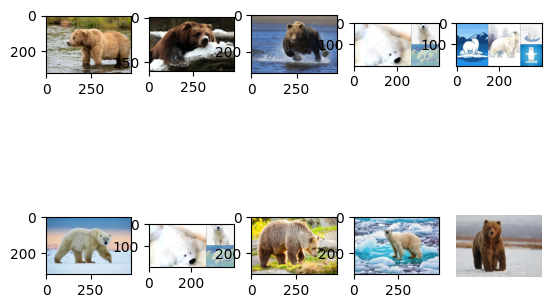

In [4]:
random_idx = np.random.randint(1,len(images_list),size=10)
fig = plt.figure()
i=1
for idx in random_idx:
    ax = fig.add_subplot(2,5,i)
    img = Image.open(images_list[idx])
    plt.imshow(img)
    i+=1
    
plt.axis('off')
plt.show()

In [5]:
class ADataset(torch.utils.data.Dataset):

    def __init__(self, file_list, transform=None):
        self.file_list = file_list
        self.transform = transform

    # dataset length
    def __len__(self):
        self.filelength = len(self.file_list)
        return self.filelength

    # load an one of images
    def __getitem__(self, idx):
        img_path = self.file_list[idx]
        # print(img_path)
        img = Image.open(img_path)
        img_transformed = self.transform(img.convert("RGB"))  #

        label = img_path.split("/")[-1].split("\\")[0]
        if label == "polar bear":
            label = 0
        elif label == "brown bear":
            label = 1

        return img_transformed, label

In [6]:
func_transforms =  transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])
  
train_data = ADataset(train_list, transform=func_transforms)
test_data = ADataset(test_list, transform=func_transforms)
val_data = ADataset(val_list, transform=func_transforms)

In [7]:
print(train_data[1])
print(val_data[0][1])

(tensor([[[0.8314, 0.8314, 0.8314,  ..., 0.8196, 0.8196, 0.8196],
         [0.8275, 0.8275, 0.8275,  ..., 0.8157, 0.8157, 0.8196],
         [0.8235, 0.8235, 0.8235,  ..., 0.8157, 0.8157, 0.8196],
         ...,
         [0.5725, 0.6039, 0.6392,  ..., 0.5059, 0.5529, 0.6039],
         [0.5725, 0.5961, 0.6275,  ..., 0.4667, 0.5137, 0.5647],
         [0.5765, 0.5922, 0.6196,  ..., 0.4392, 0.4706, 0.5059]],

        [[0.7451, 0.7451, 0.7451,  ..., 0.7373, 0.7373, 0.7373],
         [0.7451, 0.7451, 0.7451,  ..., 0.7333, 0.7333, 0.7373],
         [0.7451, 0.7451, 0.7451,  ..., 0.7333, 0.7333, 0.7373],
         ...,
         [0.6706, 0.7020, 0.7412,  ..., 0.5765, 0.6235, 0.6784],
         [0.6745, 0.6980, 0.7294,  ..., 0.5373, 0.5882, 0.6392],
         [0.6824, 0.6941, 0.7216,  ..., 0.5098, 0.5412, 0.5804]],

        [[0.6510, 0.6510, 0.6510,  ..., 0.6235, 0.6235, 0.6235],
         [0.6471, 0.6471, 0.6471,  ..., 0.6235, 0.6235, 0.6275],
         [0.6471, 0.6471, 0.6471,  ..., 0.6275, 0.6275, 0

In [8]:
lr = 0.001 # learning_rate
batch_size = 100 # we will use mini-batch method

In [9]:
train_loader = DataLoader(dataset = train_data, batch_size=batch_size, shuffle=True )
val_loader = DataLoader(dataset = val_data, batch_size=batch_size, shuffle=True )
test_loader = DataLoader(dataset = test_data, batch_size=batch_size, shuffle=True )

In [10]:
print(len(train_data), len(train_loader))
print(len(val_data), len(val_loader))
train_data[0][0].shape

1600 16
200 2


torch.Size([3, 224, 224])

In [11]:
class Cnn(nn.Module):

    def __init__(self):
        super(Cnn,self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,16,kernel_size=3, padding=0,stride=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16,32, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(32,64, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = nn.Linear(3*3*64,10)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(10,2)
        self.relu = nn.ReLU()
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = torch.nn.Flatten()(out)
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return torch.nn.Sigmoid()(out)

In [12]:
device = "cuda" if torch.cuda.is_available() else "cpu"

torch.manual_seed(1234)
if device =="cuda":
    torch.cuda.manual_seed_all(1234)
    
model = Cnn().to(device)

In [13]:
optimizer = optim.Adam(params = model.parameters(),lr=0.001)
criterion = nn.CrossEntropyLoss()

In [14]:
accuracy_values = []
loss_values = []
val_accuracy_values = []
val_loss_values = []
model.train()
def train_loop(train_loader, val_loader):
    epochs = 10
    for epoch in range(epochs):
        epoch_loss = 0
        epoch_accuracy = 0
        
        for data, label in train_loader:
            data = data.to(device)
            label = label.to(device)
            
            output = model(data)
            loss = criterion(output, label)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            acc = ((output.argmax(dim=1) == label).float().mean())
            epoch_accuracy += acc/len(train_loader)
            epoch_loss += loss/len(train_loader)  
        print("Epoch : {}, train accuracy : {}, train loss : {}".format(epoch+1, epoch_accuracy,epoch_loss))
        accuracy_values.append(float(epoch_accuracy))
        loss_values.append(float(epoch_loss))

        model.eval()
        with torch.no_grad():
            
            epoch_val_accuracy = 0
            epoch_val_loss = 0
            for data, label in val_loader:
                data = data.to(device)
                label = label.to(device)
                
                val_output = model(data)
                val_loss = criterion(val_output,label)
                
                acc = ((val_output.argmax(dim=1) == label).float().mean())
                epoch_val_accuracy += acc/ len(val_loader)
                epoch_val_loss += val_loss/ len(val_loader)
                
            val_accuracy_values.append(float(epoch_val_accuracy))
            val_loss_values.append(float(epoch_val_loss))
            print("Epoch : {}, val_accuracy : {}, val_loss : {}".format(epoch+1, epoch_val_accuracy,epoch_val_loss))
            print()

In [15]:
train_loop(train_loader, val_loader)

Epoch : 1, train accuracy : 0.7968750596046448, train loss : 0.5885389447212219
Epoch : 1, val_accuracy : 0.7649999856948853, val_loss : 0.6155332326889038

Epoch : 2, train accuracy : 0.8525000214576721, train loss : 0.5344318747520447
Epoch : 2, val_accuracy : 0.8899999856948853, val_loss : 0.46631038188934326

Epoch : 3, train accuracy : 0.8862499594688416, train loss : 0.44374358654022217
Epoch : 3, val_accuracy : 0.925000011920929, val_loss : 0.4024612307548523

Epoch : 4, train accuracy : 0.8993749618530273, train loss : 0.4158804714679718
Epoch : 4, val_accuracy : 0.9249999523162842, val_loss : 0.40091216564178467

Epoch : 5, train accuracy : 0.8956249952316284, train loss : 0.41225630044937134
Epoch : 5, val_accuracy : 0.8899999856948853, val_loss : 0.41251498460769653

Epoch : 6, train accuracy : 0.8981250524520874, train loss : 0.41283145546913147
Epoch : 6, val_accuracy : 0.925000011920929, val_loss : 0.3893287777900696

Epoch : 7, train accuracy : 0.9075000286102295, train 

In [16]:
def accuracy(train, val):
    plt.figure(figsize=(15, 5))
    plt.plot(range(len(train)), train, color="green")
    plt.plot(range(len(val)), val, color="red")
    plt.legend(["Train accuracy", "Valid accuracy"])
    plt.show()

In [17]:
def loss(train, val):
    plt.figure(figsize=(15, 5))
    plt.plot(range(len(train)), [float(value) for value in train], color="blue")
    plt.plot(range(len(val)), [float(value) for value in val], color="orange")
    plt.legend(["Train loss", "Valid loss"])
    plt.show()

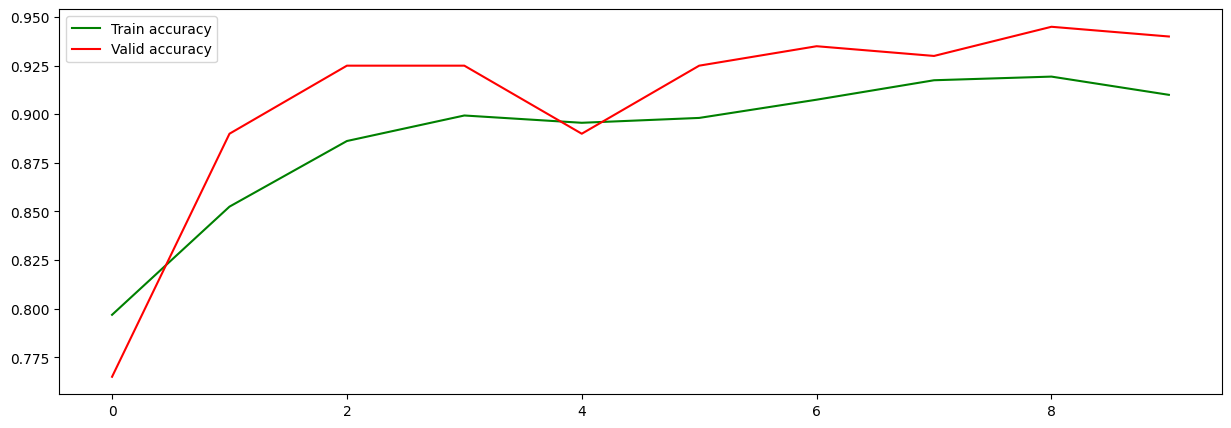

In [18]:
accuracy(accuracy_values, val_accuracy_values)

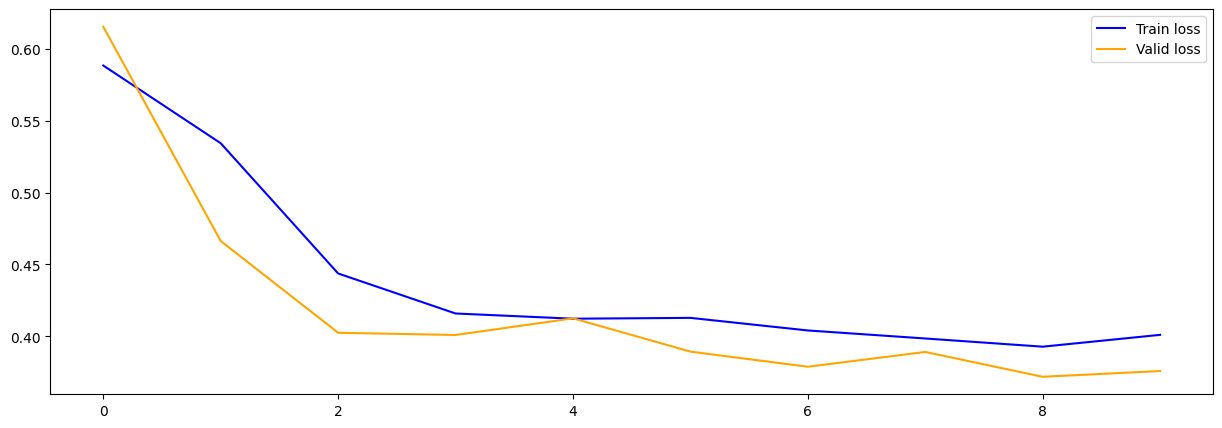

In [19]:
loss(loss_values, val_loss_values)

   ----**В данном случае сеть обучилась нормально**----

In [20]:
name_list = []
for index in range(len(test_data)):
    name = os.path.basename(test_data.file_list[index])
    name_list.append(os.path.splitext(name)[0])

In [21]:
bear_probs = []
model.eval()
with torch.no_grad():
    for data, fileid in test_loader:
        data = data.to(device)
        preds = model(data)
        preds_list = F.softmax(preds, dim=1)[:, 1].tolist()
        bear_probs += list(zip(name_list, preds_list))

In [22]:
bear_probs.sort(key = lambda x : int(x[0]))

idx = list(map(lambda x: x[0],bear_probs))
prob = list(map(lambda x: x[1],bear_probs))

submission = pd.DataFrame({"id":idx,"label":prob})
submission.to_csv('result.csv',index=False)


In [23]:
submission

,id,label
0,0014,0.730789
1,0014,0.271919
2,0016,0.269076
3,0016,0.269906
4,0021,0.269323
...,...,...
195,0965,0.269038
196,0987,0.731052
197,0987,0.731055
198,0995,0.730948


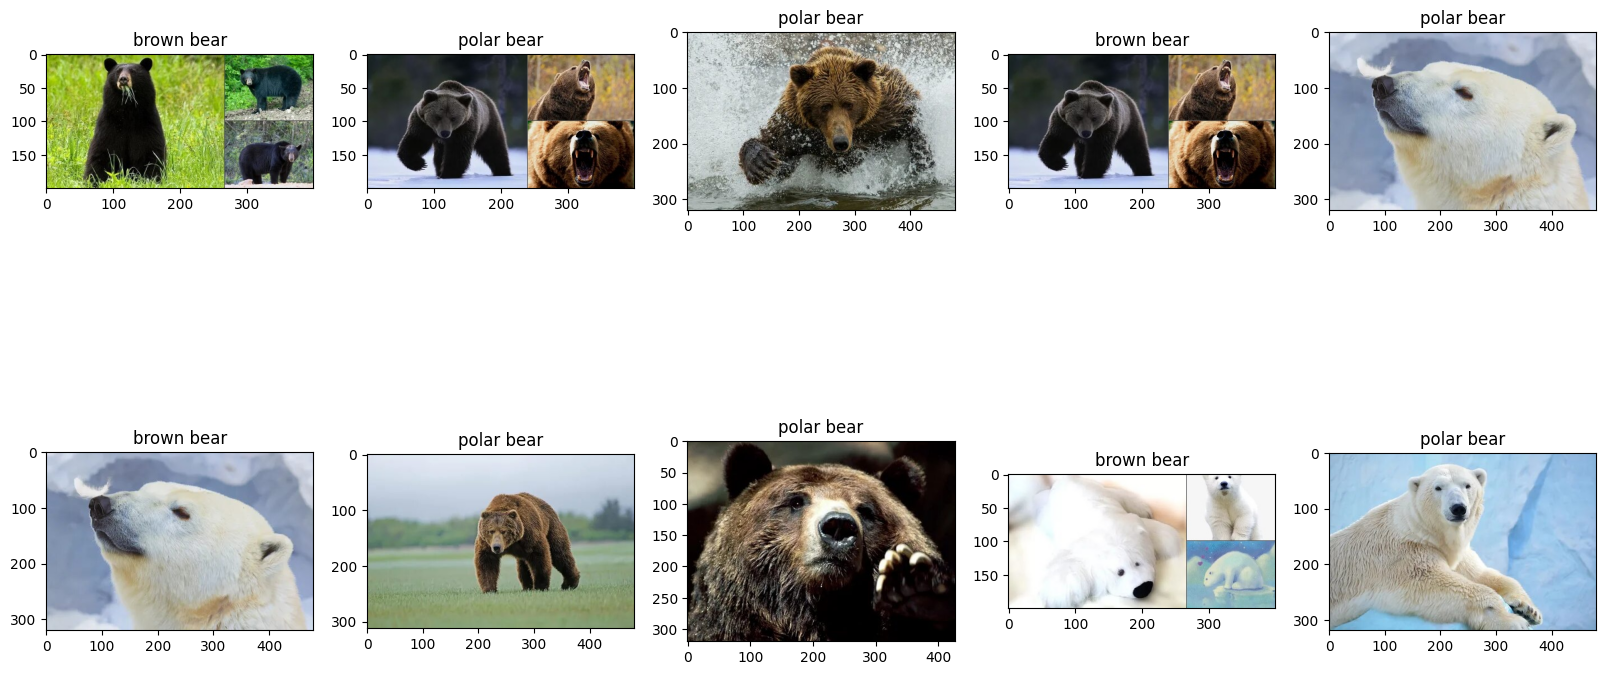

In [24]:
class_ = {0: "polar bear", 1: "brown bear"}
fig, axes = plt.subplots(2, 5, figsize=(20, 10), facecolor='w')
for ax in axes.ravel():
    i = random.choice(submission["id"].values)
    class_random = random.choice(["polar bear", "brown bear"])
    label = submission.loc[submission["id"] == i, "label"].values[0]
    if label > 0.5:
        label = 1
    else:
        label = 0
    img_path = os.path.join("C:/Users/mrney/Desktop/py/new_folder", f"{class_random}_{i}.jpg")
    img = Image.open(img_path)
    ax.set_title(class_[label])
    ax.imshow(img)

**По результатам работы с тестовыми данными и графикам точности можно сказать, что НС переучилась**